## Reducing dimensions

### Introduction

OpenEO has a library of processes. Processes are pre-defined functions that perform a certain analysis on the satellite data. Some examples are operations like addition and multiplication or aggregations like mean and median. In this notebook we will show the process of reduction. It's an operation that will result in a reduced amount of dimensions in the Datacube.

### Objective

The objective of this tutorial is to teach you how a process works in action and explain the process of reduction.

### In this lesson, you will explore the following concepts:

A. **Processes**: Find out how to use processes and learn how to apply one on a simple example.

B. **Reducing the dimensions of a Datacube**: OpenEO allows us to reduce the dimensions of a Datacube. We will explain the concept and do an example.


### Tools You'll Use:

- **OpenEO**: To interact with satellite data and perform operations on the Datacube.
- **Matplotlib**: For visualizing the results of your analysis.

### Learning Outcomes:

By the end of this tutorial, you will be able to:

- Know basic usage of OpenEO processes
- Reduce the amount of dimensions you want to work with

### Let's Begin:

We'll start by importing with creating a connection to the openeo back-end, we then proceed to download two images. We will now reduce those images in different ways. We start with reducing the time dimension, keeping only one image. Then we proceed with calculating the mean of the bands, reducing them into one single band for each image.

In [1]:
import openeo
import numpy as np
from config import user,passwd,eo_service_url
from demo_regions import s2
from demo_helpers import show_result, show_zipped_results


In [2]:
connection = openeo.connect(eo_service_url)
connection.authenticate_basic(username=user, password=passwd)

<Connection to 'https://openeo.digitalearth.se/' with BasicBearerAuth>

In [3]:
s2_datacube=connection.load_collection(collection_id=s2.s2_msi_l2a,
                         spatial_extent=s2.bbox.karlstad_mini_land,
                         temporal_extent=s2.timespans.two_images,
                        bands=['b04', 'b03', 'b02'],
                        )

In [4]:
# Show information
print(s2_datacube.flat_graph())
s2_image_data = s2_datacube.download(format="gtiff")

{'loadcollection1': {'process_id': 'load_collection', 'arguments': {'bands': ['b04', 'b03', 'b02'], 'id': 's2_msi_l2a', 'spatial_extent': {'west': 13.460930954751282, 'east': 13.585449709728213, 'south': 59.36327761288911, 'north': 59.40107161575003}, 'temporal_extent': ['2021-11-30T00:00:00Z', '2021-12-03T00:00:00Z']}, 'result': True}}


[<open DatasetReader name='/var/folders/z8/rlxnx8ys0plf685w66sqlrtw0000gq/T/tmp_pfsxvsk/605fc0c1-16bb-47d8-a368-a18346b16662/out_2021_11_30T10_33_09.tif' mode='r'>,
 <open DatasetReader name='/var/folders/z8/rlxnx8ys0plf685w66sqlrtw0000gq/T/tmp_pfsxvsk/605fc0c1-16bb-47d8-a368-a18346b16662/out_2021_12_02T10_24_01.tif' mode='r'>]

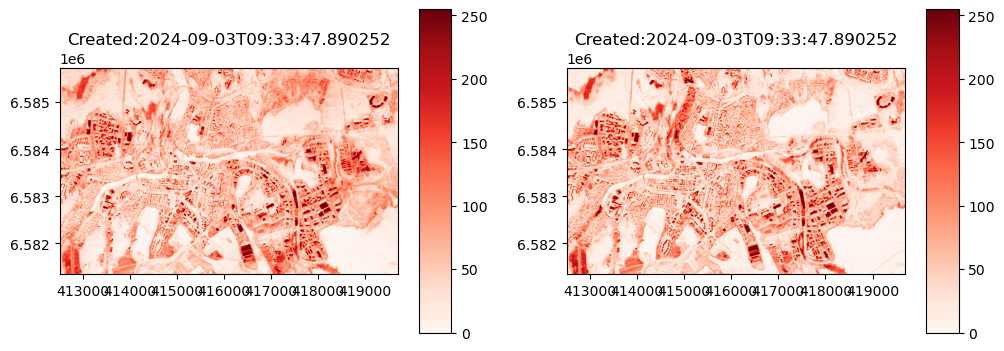

In [5]:
show_result(s2_image_data, 'Reds')

# Reduction

Reductions in OpenEO are operations that reduce the dimensionality of the data. The `reduce_dimension` process collapses a whole dimension of the datacube. It does so by using some sort of reducer, which is a function that calculates a single result from an amount of values, as e.g. mean(), min() and max() which is calculated over a specified dimension (e.g., time, bands).

![reduction](https://openeo.org/assets/img/dc_reduce.872f16c2.png)

Figure: Overview of reducing the sample datacube. Dimensions that are reduced are crossed out in the result images. Their information value has been compressed by a reducer function. Our timespan is:

In [6]:
s2.timespans.two_images

['2021-11-30T00:00:00Z', '2021-12-03T00:00:00Z']

### Time reduction
If we reduce the time and take the minimum we should only get the first image.

{'loadcollection1': {'process_id': 'load_collection', 'arguments': {'bands': ['b04', 'b03', 'b02'], 'id': 's2_msi_l2a', 'spatial_extent': {'west': 13.460930954751282, 'east': 13.585449709728213, 'south': 59.36327761288911, 'north': 59.40107161575003}, 'temporal_extent': ['2021-11-30T00:00:00Z', '2021-12-03T00:00:00Z']}}, 'reducedimension1': {'process_id': 'reduce_dimension', 'arguments': {'data': {'from_node': 'loadcollection1'}, 'dimension': 't', 'reducer': {'process_graph': {'min1': {'process_id': 'min', 'arguments': {'data': {'from_parameter': 'data'}}, 'result': True}}}}, 'result': True}}


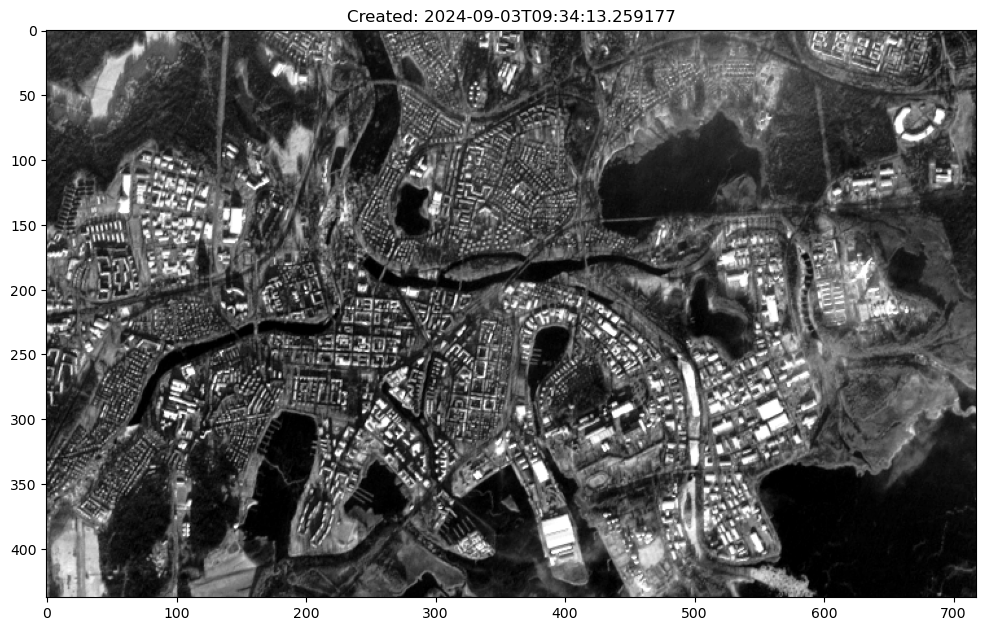

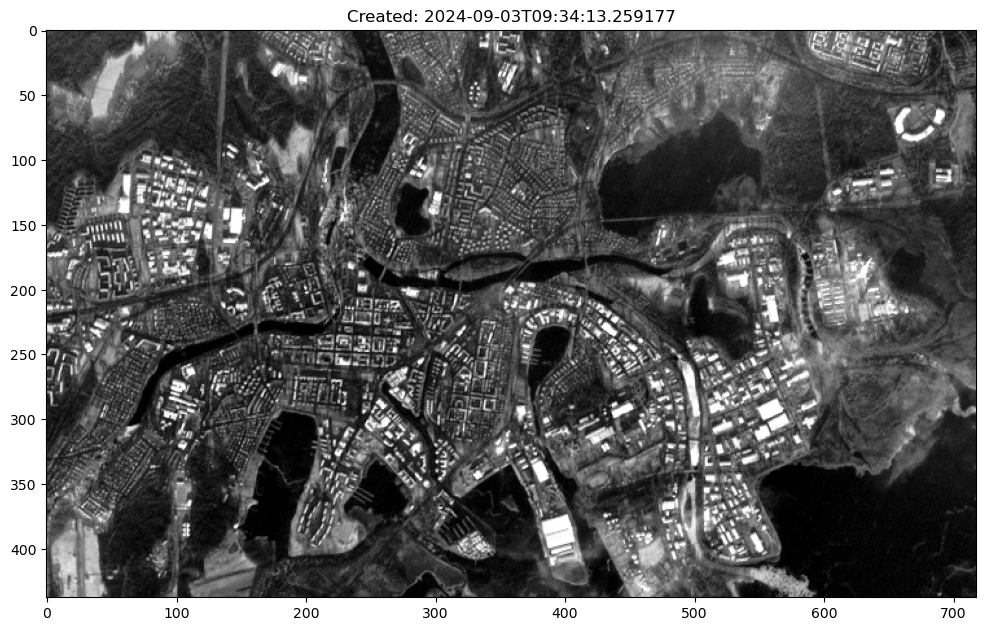

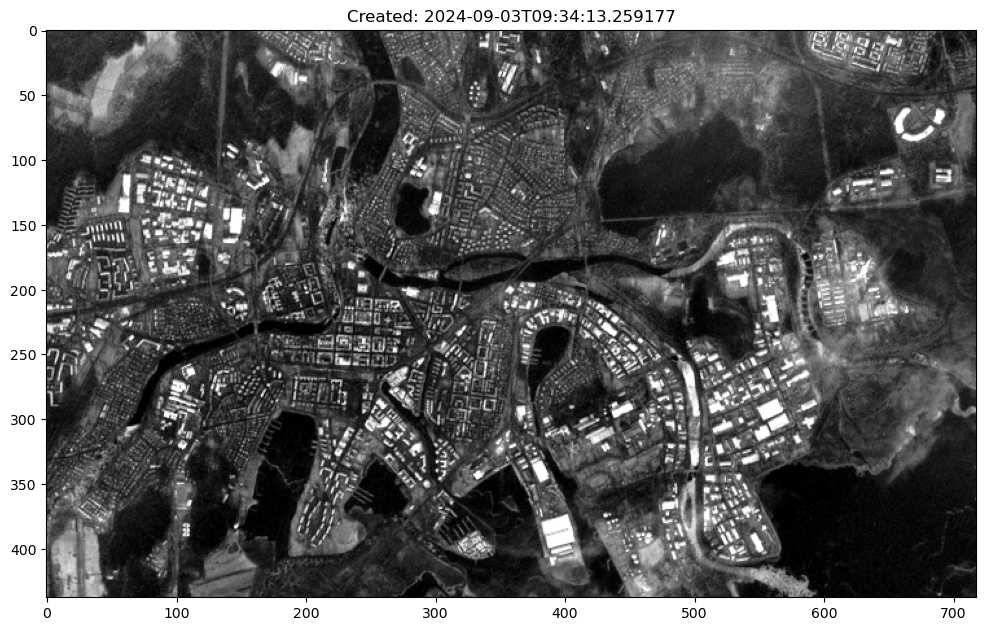

In [7]:
reduced_cube_over_time = s2_datacube.reduce_dimension(dimension="t", reducer="min")

# Show information
print(reduced_cube_over_time.flat_graph())
s2_image_data_reduced = reduced_cube_over_time.download(format="gtiff")
results_time_reduce=show_result(s2_image_data_reduced, "Greys_r")

Let's check our results:

In [8]:
print("We expect a single raster to look at, number of rasters is:", len(results_time_reduce))
print("We should have multiple bands in the metadata, check the index:", results_time_reduce[0].indexes) 

We expect a single raster to look at, number of rasters is: 1
We should have multiple bands in the metadata, check the index: (1, 2, 3)


### Band reduction
Let's try to reduce the dimension over the bands instead. In this example we choose the mean. This means that we will take the mean of the two bands that we have available for each day.

{'loadcollection1': {'process_id': 'load_collection', 'arguments': {'bands': ['b04', 'b03', 'b02'], 'id': 's2_msi_l2a', 'spatial_extent': {'west': 13.460930954751282, 'east': 13.585449709728213, 'south': 59.36327761288911, 'north': 59.40107161575003}, 'temporal_extent': ['2021-11-30T00:00:00Z', '2021-12-03T00:00:00Z']}}, 'reducedimension1': {'process_id': 'reduce_dimension', 'arguments': {'data': {'from_node': 'loadcollection1'}, 'dimension': 'bands', 'reducer': {'process_graph': {'mean1': {'process_id': 'mean', 'arguments': {'data': {'from_parameter': 'data'}}, 'result': True}}}}, 'result': True}}


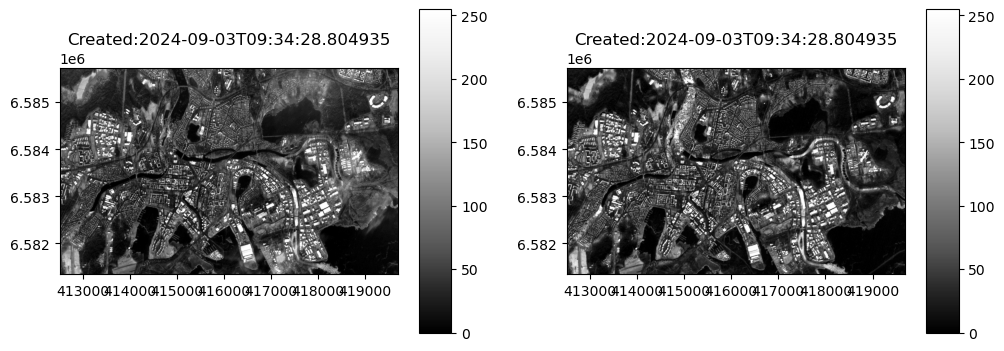

In [9]:
reduced_cube_over_bands = s2_datacube.reduce_dimension(dimension="bands", reducer="mean")

# Show information
print(reduced_cube_over_bands.flat_graph())
# reduced_cube_over_bands.metadata
s2_image_data_reduced = reduced_cube_over_bands.download(format="gtiff")
results_bands_reduce = show_result(s2_image_data_reduced, "Greys_r")

The figure show each image with the mean of Red, Blue, Green bands ('b04', 'b03', 'b02' respectively) in greyscale.

In [11]:
print("We expect multiple rasters to look at, number of rasters is:", 
      len(results_bands_reduce))
print("We should have multiple a single band in the metadata, check the index:", 
      results_bands_reduce[0].indexes) 

We expect multiple rasters to look at, number of rasters is: 2
We should have multiple a single band in the metadata, check the index: (1,)


We can also check if the calculation is correct. We first calculate the mean of the bands of the first pixel from the first image:

In [12]:
np.mean([results_time_reduce[0].read(1)[0,0], 
         results_time_reduce[0].read(2)[0,0], 
         results_time_reduce[0].read(3)[0,0]])

951.3333333333334

We compare it with the value of the single band in the first picture in the band reduce result:

In [13]:
results_bands_reduce[0].read(1)[0,0]

951.3333333333334

Calculation was successful!